In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### CSV File name NFL_Play_by_Play_2009-2018_(v5)_CSV
##### home_team column c(3)
##### away_team column d(4)
##### posteam column e(5)
##### game_date column j(10)
##### time column u (21)
##### desc column y (25)
##### play_type (pass vs run) column z(26) 
##### yards_gained column aa(27) 
##### total_home_score column ay(51) 
##### total_away_score column az(52) 


In [63]:
##### Pull in CSV file
nfl_df = pd.read_csv("../data/NFL_Play_by_Play_2009-2018_(v5).csv")
nfl_df.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [64]:
##### Create df with only the columns needed
nfl_col_df = nfl_df.loc[:,['play_id', 'game_id', 'home_team', 'away_team', 'posteam', 'game_date', 'time', 'desc', 'play_type', 'yards_gained'
, 'total_home_score', 'total_away_score']]
nfl_col_df.head(180)



,play_id,game_id,home_team,away_team,posteam,game_date,time,desc,play_type,yards_gained,total_home_score,total_away_score
0,46,2009091000,PIT,TEN,PIT,2009-09-10,15:00,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,kickoff,0.0,0,0
1,68,2009091000,PIT,TEN,PIT,2009-09-10,14:53,(14:53) B.Roethlisberger pass short left to H....,pass,5.0,0,0
2,92,2009091000,PIT,TEN,PIT,2009-09-10,14:16,(14:16) W.Parker right end to PIT 44 for -3 ya...,run,-3.0,0,0
3,113,2009091000,PIT,TEN,PIT,2009-09-10,13:35,(13:35) (Shotgun) B.Roethlisberger pass incomp...,pass,0.0,0,0
4,139,2009091000,PIT,TEN,PIT,2009-09-10,13:27,(13:27) (Punt formation) D.Sepulveda punts 54 ...,punt,0.0,0,0
5,162,2009091000,PIT,TEN,TEN,2009-09-10,13:16,(13:16) C.Johnson up the middle to TEN 2 for n...,run,0.0,0,0
6,183,2009091000,PIT,TEN,TEN,2009-09-10,12:40,(12:40) K.Collins pass short left to A.Hall to...,pass,4.0,0,0
7,207,2009091000,PIT,TEN,TEN,2009-09-10,12:11,(12:11) (Shotgun) C.Johnson left end to TEN 4 ...,run,-2.0,0,0
8,228,2009091000,PIT,TEN,TEN,2009-09-10,11:34,(11:34) (Punt formation) C.Hentrich punts 50 y...,punt,0.0,0,0
9,253,2009091000,PIT,TEN,PIT,2009-09-10,11:24,(11:24) B.Roethlisberger pass short right to M...,pass,3.0,0,0


In [73]:
##### Create a Pass DataFrame
pass_nfl_col_df = nfl_col_df[(nfl_col_df['play_type'] == 'pass')]
pass_nfl_col_df.head(100)

#(nfl_col_df['play_type'] == 'pass')
#(nfl_col_df['game_id'] == 2009091000)

,play_id,game_id,home_team,away_team,posteam,game_date,time,desc,play_type,yards_gained,total_home_score,total_away_score
1,68,2009091000,PIT,TEN,PIT,2009-09-10,14:53,(14:53) B.Roethlisberger pass short left to H....,pass,5.0,0,0
3,113,2009091000,PIT,TEN,PIT,2009-09-10,13:35,(13:35) (Shotgun) B.Roethlisberger pass incomp...,pass,0.0,0,0
6,183,2009091000,PIT,TEN,TEN,2009-09-10,12:40,(12:40) K.Collins pass short left to A.Hall to...,pass,4.0,0,0
9,253,2009091000,PIT,TEN,PIT,2009-09-10,11:24,(11:24) B.Roethlisberger pass short right to M...,pass,3.0,0,0
10,277,2009091000,PIT,TEN,PIT,2009-09-10,10:48,(10:48) B.Roethlisberger pass short left to S....,pass,10.0,0,0
12,322,2009091000,PIT,TEN,PIT,2009-09-10,09:43,(9:43) B.Roethlisberger pass short right to H....,pass,9.0,0,0
13,346,2009091000,PIT,TEN,PIT,2009-09-10,09:01,(9:01) B.Roethlisberger sacked at TEN 41 for -...,pass,-19.0,0,0
16,425,2009091000,PIT,TEN,TEN,2009-09-10,07:57,(7:57) K.Collins pass deep left to B.Scaife to...,pass,20.0,0,0
18,470,2009091000,PIT,TEN,TEN,2009-09-10,06:57,(6:57) K.Collins pass incomplete short right t...,pass,0.0,0,0
19,496,2009091000,PIT,TEN,TEN,2009-09-10,06:52,(6:52) (Shotgun) K.Collins pass incomplete sho...,pass,0.0,0,0


In [66]:
##### Create a Run DataFrame
run_nfl_col_df = nfl_col_df.loc[nfl_col_df['play_type'] == 'run' , :]
run_nfl_col_df.head()

,play_id,game_id,home_team,away_team,posteam,game_date,time,desc,play_type,yards_gained,total_home_score,total_away_score
2,92,2009091000,PIT,TEN,PIT,2009-09-10,14:16,(14:16) W.Parker right end to PIT 44 for -3 ya...,run,-3.0,0,0
5,162,2009091000,PIT,TEN,TEN,2009-09-10,13:16,(13:16) C.Johnson up the middle to TEN 2 for n...,run,0.0,0,0
7,207,2009091000,PIT,TEN,TEN,2009-09-10,12:11,(12:11) (Shotgun) C.Johnson left end to TEN 4 ...,run,-2.0,0,0
11,301,2009091000,PIT,TEN,PIT,2009-09-10,10:21,(10:21) W.Parker right guard to TEN 31 for -1 ...,run,-1.0,0,0
15,393,2009091000,PIT,TEN,TEN,2009-09-10,08:20,(8:20) C.Johnson right end to TEN 43 for 32 ya...,run,32.0,0,0


In [117]:
##### Pull home and away teams per game ID
h_a_df = run_nfl_col_df
h_a_df
h_a_df = h_a_df.drop_duplicates(['game_id'])
#h_a_df['game_id', 'home_team', 'away_team'].head()
h_a_df.to_csv(r"../data/Home_Away(SF).csv")



In [121]:
##### Sum up of PASSING yards_gained per game_id based on posteam

##### .groupby game_id then groupby posteam
pass_nfl_col_gb_df = pass_nfl_col_df.groupby(['game_id', 'posteam'])

pass_nfl_col_yg_df = pd.DataFrame({'yards_gained': pass_nfl_col_gb_df['yards_gained'].sum()})   

##.groupby('posteam')
pass_nfl_col_yg_df.head(10)

#pass_nfl_col_yg_df.to_csv(r"../data/NFL_pass_yg(SF).csv")


yards_gained
game_id    posteam              
2009091000 PIT             321.0
           TEN             234.0
2009091300 ATL             213.0
           MIA             163.0
2009091301 BAL             303.0
           KC              159.0
2009091302 CAR              83.0
           PHI              82.0
2009091303 CIN             221.0
           DEN             227.0

In [305]:
##### Sum up of RUNNING yards_gained per game_id based on posteam

##### .groupby game_id then groupby posteam
run_nfl_col_gb_df = run_nfl_col_df.groupby(['game_id', 'posteam'])

run_nfl_col_yg_df = pd.DataFrame({'yards_gained': run_nfl_col_gb_df['yards_gained'].sum()}) 


In [399]:
run_nfl_col_yg_df = run_nfl_col_yg_df.reset_index()

##.groupby('posteam')
run_nfl_col_yg_df.head(10)

#run_nfl_col_yg_df.to_csv(r"../data/NFL_run_yg(SF).csv")

,game_id,posteam,yards_gained
0,2009091000,PIT,36.0
1,2009091000,TEN,86.0
2,2009091300,ATL,72.0
3,2009091300,MIA,96.0
4,2009091301,BAL,198.0
5,2009091301,KC,29.0
6,2009091302,CAR,87.0
7,2009091302,PHI,186.0
8,2009091303,CIN,86.0
9,2009091303,DEN,75.0


In [400]:
##### Pull in the Final Scores and the winner
wl_nfl_col_df = nfl_col_df.groupby(['game_id'])
NFL_home_score = (wl_nfl_col_df['total_home_score'].max())
NFL_away_score = (wl_nfl_col_df['total_away_score'].max())
#NFL_home_score.to_csv(r"../data/NFL_home_score(SF).csv")
#NFL_away_score.to_csv(r"../data/NFL_away_score(SF).csv")

In [402]:
##### Read csv file
pass_run_outcome_df = pd.read_csv("../data/pass_run_outcome.csv")
pass_run_outcome_df.head()

,game_id,home_team,away_team,home_yards_gained_passing,away_yards_gained_passing,home_yards_gained_running,away_yards_gained_running,total_home_score,total_away_score,winner
0,2009091000,PIT,TEN,321,234,36,86,13,10,PIT
1,2009091300,ATL,MIA,213,163,72,96,19,7,ATL
2,2009091301,BAL,KC,303,159,198,29,38,23,BAL
3,2009091302,CAR,PHI,83,82,87,186,10,36,PHI
4,2009091303,CIN,DEN,221,227,86,75,7,12,DEN


In [403]:
##### Count the total # of wins for all teams (# of games in the time period reviewed)
pass_run_outcome_df['winner'].count()

2512

In [404]:
##### Figuring out Winner Passing Yards
def winner_passing_yards (row):
    if row['home_team'] == row['winner']:
        return row['home_yards_gained_passing']
    else:
        return row['away_yards_gained_passing']
       
pass_run_outcome_df['winner_passing_yards'] = pass_run_outcome_df.apply(lambda row : winner_passing_yards(row), axis = 1)  


    
##### Figuring out Winner Running Yards
def winner_running_yards (row):
    if row['home_team'] == row['winner']:
        return row['home_yards_gained_running']
    else:
        return row['away_yards_gained_running']
       
pass_run_outcome_df['winner_running_yards'] = pass_run_outcome_df.apply(lambda row : winner_running_yards(row), axis = 1)  

pass_run_outcome_df.head()

,game_id,home_team,away_team,home_yards_gained_passing,away_yards_gained_passing,home_yards_gained_running,away_yards_gained_running,total_home_score,total_away_score,winner,winner_passing_yards,winner_running_yards
0,2009091000,PIT,TEN,321,234,36,86,13,10,PIT,321,36
1,2009091300,ATL,MIA,213,163,72,96,19,7,ATL,213,72
2,2009091301,BAL,KC,303,159,198,29,38,23,BAL,303,198
3,2009091302,CAR,PHI,83,82,87,186,10,36,PHI,82,186
4,2009091303,CIN,DEN,221,227,86,75,7,12,DEN,227,75


In [407]:
##### ***** Use this code for the final results ******
pass_run_outcome_df = pass_run_outcome_df.rename(columns={'winner' : 'Team'})
#pass_run_outcome_df.head()

In [410]:
##### Groupby Winner and count then sort from highest to lowest
#winner_df = pass_run_outcome_df.sort_values(pass_run_outcome_df['game_id'].count(), ascending=False)

winner_group=pass_run_outcome_df.groupby(['Team'])
winner_df = winner_group.sum()
winner_df.drop(columns='game_id', inplace=True)
winner_df=winner_df.merge(winner_group['game_id'].count(),left_index=True, right_index=True)
winner_df.head()
##### Games won sorted by total wins
#games_won_df = pd.DataFrame(winner_df)
#games_won_df = games_won_df.reset_index()
#games_won_df = games_won_df.sort_values('game_id', ascending=False)
#games_won_df.columns = ['winner','wins','winner_passing_yards','winner_running_yards']
#games_won_df.head(8)


,home_yards_gained_passing,away_yards_gained_passing,home_yards_gained_running,away_yards_gained_running,total_home_score,total_away_score,winner_passing_yards,winner_running_yards,game_id
Team,,,,,,,,,
ARI,18917,18240,7511,8272,1764,1620,19148,8820,79
ATL,22713,22742,10028,9687,2251,2093,23731,10955,90
BAL,20105,18548,10704,9479,2071,1603,20576,12110,91
BUF,12967,13210,9807,7918,1441,1226,12486,10527,66
CAR,16870,17095,9871,9030,1857,1692,16400,11965,79


In [412]:
winner_df['winner_passing_perc']=winner_df.winner_passing_yards/(winner_df.winner_passing_yards+winner_df.winner_running_yards)

winner_df['winner_running_perc']=winner_df.winner_running_yards/(winner_df.winner_passing_yards+winner_df.winner_running_yards)

winner_df.head()

,home_yards_gained_passing,away_yards_gained_passing,home_yards_gained_running,away_yards_gained_running,total_home_score,total_away_score,winner_passing_yards,winner_running_yards,game_id,winner_passing_perc,winner_running_perc
Team,,,,,,,,,,,
ARI,18917,18240,7511,8272,1764,1620,19148,8820,79,0.684640,0.315360
ATL,22713,22742,10028,9687,2251,2093,23731,10955,90,0.684167,0.315833
BAL,20105,18548,10704,9479,2071,1603,20576,12110,91,0.629505,0.370495
BUF,12967,13210,9807,7918,1441,1226,12486,10527,66,0.542563,0.457437
CAR,16870,17095,9871,9030,1857,1692,16400,11965,79,0.578177,0.421823


In [439]:
##### total_passing_yards & total_running_yards as a percentage of the total wins reflected as
##### 2 seperate items in the bar chart

#total_yards = total_passing_yards + total_running_yards

#pass_perc = (total_passing_yards / total_yards)

#run_perc = (total_running_yards / total_yards)


##### Take the wins and multiply by pass_perc to get the shading for the bar chart

##### Take the wins and multiply by run_perc to get the shading for the bar chart
#pass_run_outcome_perc_df = pass_run_outcome_df

##### Figuring out Winner Passing Yards Percent

winner_df = winner_df.sort_values('game_id', ascending = False)

winner_df.head(8)

#top_8 = {'NE', 'PIT', 'NO', 'GB', 'SEA', 'BAL', 'ATL', 'DEN'}

##### Create a DataFrame for the top 8 
top_winner_df = winner_df.head(5)
top_winner_df = top_winner_df.rename(columns={'winner_passing_perc' : 'Passing %', 'winner_running_perc' : 'Running %', 'game_id' : 'Total Wins'})

top_winner_df = top_winner_df.drop(columns = ['home_yards_gained_passing', 'away_yards_gained_passing', 'home_yards_gained_running',
                                   'away_yards_gained_running', 'total_home_score', 'total_away_score', 'winner_passing_yards',
                                   'winner_running_yards'])

top_winner_df = top_winner_df.reset_index()
top_winner_df   

    


,Team,Total Wins,Passing %,Running %
0,NE,121,0.685684,0.314316
1,PIT,103,0.690758,0.309242
2,NO,99,0.695689,0.304311
3,GB,99,0.685017,0.314983
4,SEA,92,0.609263,0.390737


In [424]:
data = [['NE', 'NE', 'PIT', 'PIT', 'NO', 'NO', 'GB', 'GB', 'SEA', 'SEA', 'BAL', 'BAL', 'ATL', 'ATL', 'DEN', 'DEN'], 
        ['Passing', 'Running', 'Passing', 'Running', 'Passing', 'Running', 'Passing', 'Running', 'Passing', 'Running', 
        'Passing', 'Running', 'Passing', 'Running', 'Passing', 'Running', ], 
        [121*0.685684, 121*0.314316, 103*0.690758, 103*0.309242, 99*0.695689, 99*0.304311, 
         99*0.685017, 99*0.314983, 92*0.609263, 92*0.390737, 91*0.629505, 91*0.370495, 
         90*0.684167, 90*0.315833, 89*0.656653, 89*0.343347]]
           
rows = zip(data[0], data[1], data[2])
headers = ['Team', 'Play', 'Total Wins']
top_winner_chart_df = pd.DataFrame(rows, columns = headers)

top_winner_chart_df['Total Wins'] = top_winner_chart_df['Total Wins']

top_winner_chart_df.head()
           

,Team,Play,Total Wins
0,NE,Passing,82.967764
1,NE,Running,38.032236
2,PIT,Passing,71.148074
3,PIT,Running,31.851926
4,NO,Passing,68.873211


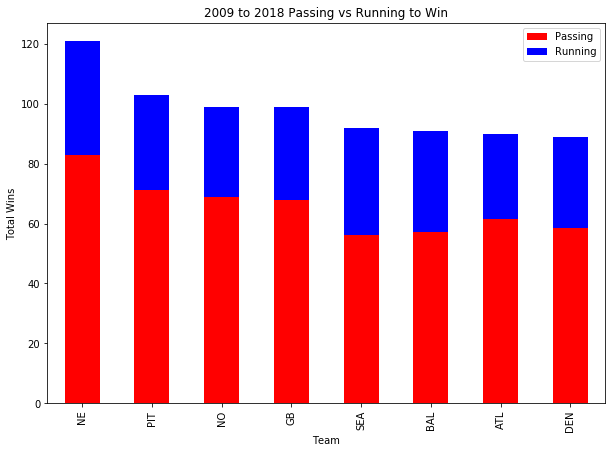

In [440]:
fig, ax = plt.subplots(figsize=(10,7))  

plays = top_winner_chart_df['Play'].drop_duplicates()
margin_bottom = np.zeros(len(top_winner_chart_df['Team'].drop_duplicates()))
colors = ["r", "b"]

for num, play in enumerate(plays):
    wins = list(top_winner_chart_df[top_winner_chart_df['Play'] == play].loc[:, 'Total Wins'])

    top_winner_chart_df[top_winner_chart_df['Play'] == play].plot.bar(x='Team',y='Total Wins', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=play, title = '2009 to 2018 Passing vs Running to Win')
    margin_bottom += wins

plt.ylabel('Total Wins')
plt.show()